<a href="https://colab.research.google.com/github/stepheodhiambo2000/BUSINESS-ANALYST/blob/main/Logistic_Regression_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "Diabetes.csv" dataset to predict whether a patient is Diabetic or Non-Diabetic based on features like glucose and blood pressure using a Logistic Regression model.

## Load the dataset

### Subtask:
Load the `Diabetes.csv` file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display its head and info.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/diabetes.csv')

# Display the first few rows and information
display(df.head())
display(df.info())

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


None

Value counts for the target variable 'Outcome':
Outcome
tested_negative    500
tested_positive    268
Name: count, dtype: int64


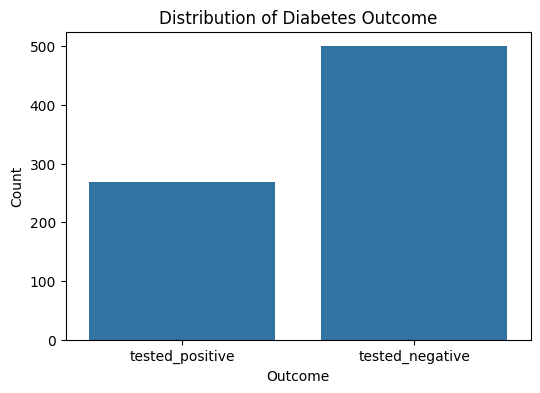

In [17]:
# Check for class imbalance in the target variable
print("Value counts for the target variable 'Outcome':")
print(df['Outcome'].value_counts())

# Optionally, visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume the last column is the target variable and rename it
df.rename(columns={df.columns[-1]: 'Outcome'}, inplace=True)

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training set shape: (614, 8)
Testing set shape: (154, 8)

Accuracy: 0.74

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.77      0.85      0.81       101
tested_positive       0.65      0.53      0.58        53

       accuracy                           0.74       154
      macro avg       0.71      0.69      0.70       154
   weighted avg       0.73      0.74      0.73       154


Confusion Matrix:
[[86 15]
 [25 28]]


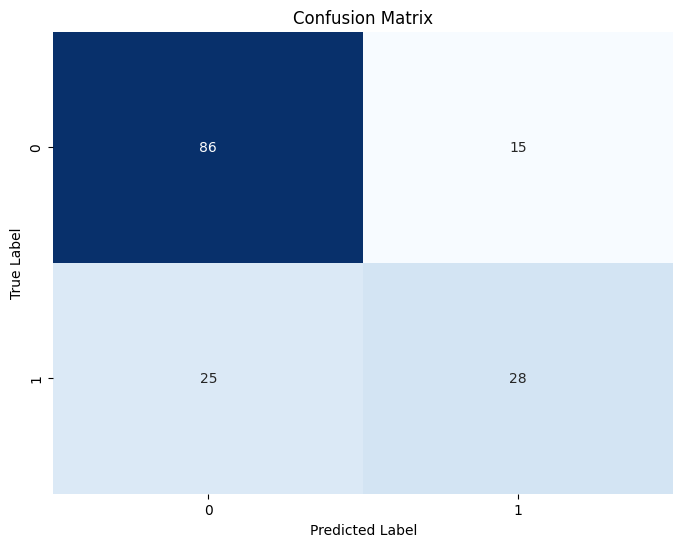

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test ,y_pred))

                 precision    recall  f1-score   support

tested_negative       0.77      0.85      0.81       101
tested_positive       0.65      0.53      0.58        53

       accuracy                           0.74       154
      macro avg       0.71      0.69      0.70       154
   weighted avg       0.73      0.74      0.73       154



In [25]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score
# For binary classification with string labels, we need to convert them to numerical labels
# Assuming 'tested_positive' is the positive class (1) and 'tested_negative' is the negative class (0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'tested_positive' else 0)
y_pred_numeric = [1 if x == 'tested_positive' else 0 for x in y_pred]

auc_score = roc_auc_score(y_test_numeric, y_pred_numeric)

print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.69


In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of training data before SMOTE:", X_train.shape)
print("Shape of training data after SMOTE:", X_train_smote.shape)
print("\nValue counts of target variable after SMOTE:")
print(y_train_smote.value_counts())

Shape of training data before SMOTE: (614, 8)
Shape of training data after SMOTE: (798, 8)

Value counts of target variable after SMOTE:
Outcome
tested_negative    399
tested_positive    399
Name: count, dtype: int64


In [27]:
# Initialize and train a new Logistic Regression model using SMOTE-augmented data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the new model
print("Evaluation of Logistic Regression Model after SMOTE:")
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"\nAccuracy: {accuracy_smote:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

Evaluation of Logistic Regression Model after SMOTE:

Accuracy: 0.70

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.80      0.72      0.76       101
tested_positive       0.56      0.66      0.60        53

       accuracy                           0.70       154
      macro avg       0.68      0.69      0.68       154
   weighted avg       0.72      0.70      0.71       154


Confusion Matrix:
[[73 28]
 [18 35]]


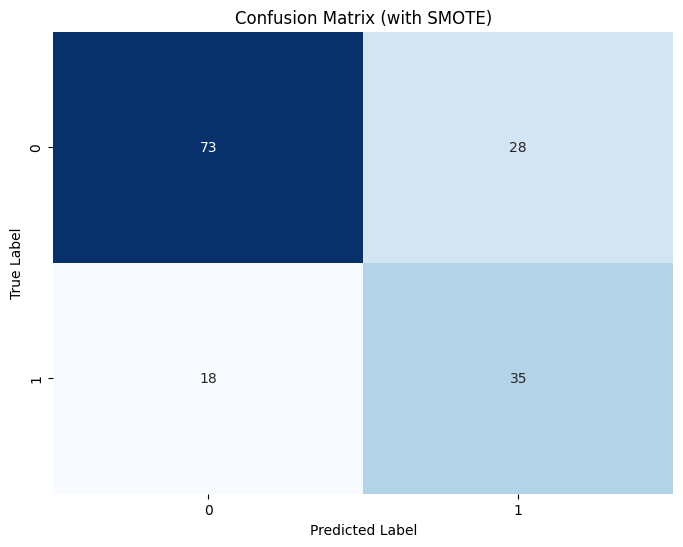

In [28]:
# Plot the confusion matrix for the SMOTE model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (with SMOTE)')
plt.show()